<a href="https://colab.research.google.com/github/JoseEnriqueMendo/EQ2_PROYECTO_BD/blob/main/EQ2_TGI_S16_APLICACI%C3%93N_FINAL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#@title  { run: "auto", display-mode: "form" }
#IMPORTACIÓN DE LIBRERIAS 
import math 
import pandas_datareader as web 
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
from pandas_datareader import data as pdr
from datetime import date
from datetime import timedelta
import yfinance as yf

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
final=(date.today()-timedelta(days=1)).strftime("%Y-%m-%d")


[*********************100%***********************]  1 of 1 completed


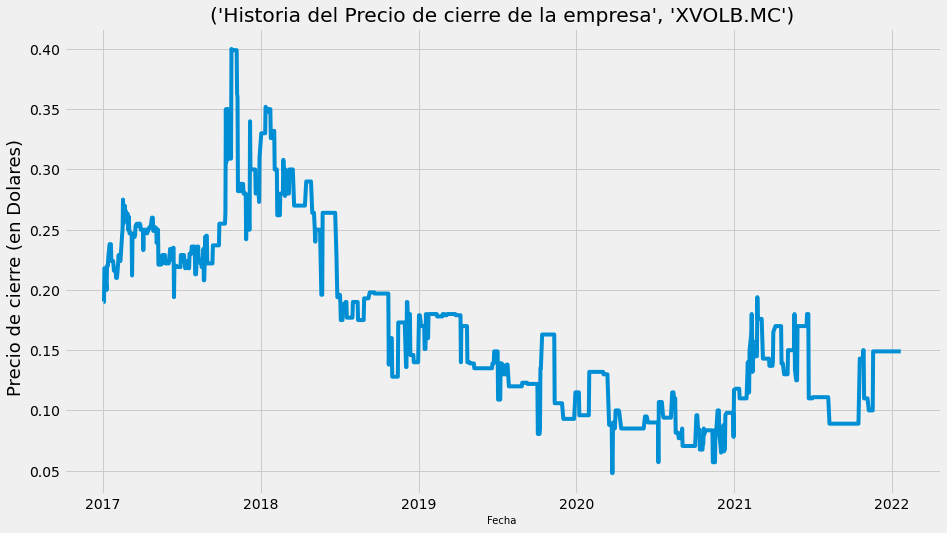

In [ ]:
#@title Lista de Empresas Mineras { run: "auto" }

lista='XVOLB.MC' #@param ["XVOLB.MC","XVALO.MC","XUSI.MC","MAIFF","LGDTF","LRTNF","SILV","FSM","PAAS","AEM"]
yf.pdr_override() 

# Descargar el  dataframe
df = pdr.get_data_yahoo(lista, start="2017-01-01", end=final) 
plt.figure(figsize=(14,8))
plt.title(('Historia del Precio de cierre de la empresa', lista))
plt.plot(df['Close'])
plt.xlabel('Fecha',fontsize =10 )
plt.ylabel('Precio de cierre (en Dolares)  ' ,fontsize =18 )
plt.show()

In [ ]:
#@title Texto de título predeterminado
def Predict_price( nombre, v1 , v2, v3):
 df = pdr.get_data_yahoo(nombre, start="2017-01-01", end="2020-04-30")
 x = df[['Open','High','Low']]
 y = df['Close']
 from sklearn.model_selection import train_test_split
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
 from sklearn.linear_model import LinearRegression
 rl = LinearRegression()
 rl.fit(x_train, y_train)
 predicted = rl.predict([[v1,v2,v3]])
 close_price=predicted
 return close_price 



In [ ]:
#@title Datos de entrada { run: "auto" }

Open_Price = "2.80" #@param {type:"string"}
High_Price = "2.6" #@param {type:"string"}
Low_Price = "2.73" #@param {type:"string"}
Empresas =["XVOLB.MC","XVALO.MC","XUSI.MC","MAIFF","LGDTF","LRTNF","SILV","FSM","PAAS","AEM"]
#iteraciones
prediciones=[0,0,0,0,0,0,0,0,0,0]

for i in range(10):
 prediciones[i] = Predict_price(Empresas[i],Open_Price,High_Price,Low_Price)
    
    
tabla =pd.DataFrame({"Empresas":Empresas,"Predic Close":prediciones })
tabla

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Empresas,Predic Close
0,XVOLB.MC,[2.5538421449128164]
1,XVALO.MC,[2.5797726995000994]
2,XUSI.MC,[2.591974177005111]
3,MAIFF,[2.582306969868112]
4,LGDTF,[2.623380575458951]
5,LRTNF,[2.601426747289289]
6,SILV,[2.609289579642722]
7,FSM,[2.582167256595304]
8,PAAS,[2.5782126529626073]
9,AEM,[2.590482735106741]
